# Setting

In [13]:
# 파이썬 >= 3.5 필수
import sys
assert sys.version_info >= (3, 5)

In [14]:
sys.version

'3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]'

# SVM

- 서포트 벡터(support vector): 결정 경계선과 가장 가까이 맞닿은 데이터 포인트를 의미한다.

- 마진(margin): 서포트 벡터와 결정 경계 사이의 거리를 말하는 것으로 SVM의 목표는 바로 이 마진을 최대로 하는 결정 경계를 찾는 것이다.

- 비용(cost): 성능이 좋은 머신러닝 모델이란 학습 시 에러가 적은 모델이 아니라 테스트 및 운용 시 에러가 적은 모델이다. 즉, 약간의 오류를 허용하기 위해 비용(C)이라는 변수를 사용한다.
  - 비용이 낮을수록 마진을 최대한 높이고 학습 에러율을 증가시키는 방향으로 결정 경계선을 만든다.
  - 비용이 높을수록 마진은 낮아지고 학습 에러율은 감소하는 방향으로 결정 경계선을 만든다.
  - 비용이 너무 낮으면 과소적합의 위험이 있고 너무 높으면 과대적합의 위험이 있으므로 적절한 비용값을 찾는 과정이 중요하다.

- 결정 경계(decision boundary): 주어진 데이터를 통해 잘 분류해내는 선
  - 데이터의 벡터 공간을 N차원 이라고 할 경우 결정 경계는 N-1차원이다.
  - 만약 데이터가 3차원이라면 결정 경계는 선이 아니라 면으로 나타난다. 이러한 이유로 결정 경계는 때로는 초평면(hyperplane)이라고 부르기도 한다.

- 커널 트릭(kernel trick): 2차원 공간에서는 두 개의 데이터 집합을 가로지르는 선을 찾는 것이고, 3차원공간에서는 두 개의 데이터 집합을 가로지르는 초평면을 찾는 것이 SVM의 핵심이다.
  - 저차원의 데이터를 고차원의 데이터로 옮겨주는 함수는 매핑함수라고 부른다.
  - 고차원으로 데이터를 옮겨서 결정 경계를 찾는 법이 커널 트릭이다.

- 선형 SVM: 커널을 사용하지 않고 데이터를 분류하는 것으로 비용(C)을 조절해서 마진의 크기를 조절

- 커널 트릭: 주어진 데이터가 선형 분리로 불가능할 경우 고차원으로 데이터를 옮기는 효과를 통해 결정 경계를 찾는 것으로 비용(C)과 gamma를 조절해서 마진을 조절할 수 있다.

- RBF 커널: 가우시안 RBF 커널을 사용하는 것으로 가우시안 함수의 표준편차를 조정함으로써 결정 경계의 곡률을 조정하는 데 이 표준편차 조정 변수를 감마(gamma)라고 부른다.
  - 감마가 커지면 데이터 포인트 별로 허용하는 표준편차가 작아져서 결정경계가 작아지면서 구부러지는 모양을 나타낸다.

# 문제 정의
- 2017년 NBA 선수들의 농구 플레이 데이터셋으로 포지션을 예측

In [15]:
# 필수 라이브러리
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn
import seaborn as sns

# seaborn style
sns.set_theme()

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline


# Dataset Loading

In [16]:
df = pd.read_csv('basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [22]:
x = df.drop(['Pos'], axis=1)
y = df.Pos
print(x.shape, y.shape)

(100, 7) (100,)


# Preprocessing

## train / test

In [23]:
from sklearn.model_selection import train_test_split

x = df[['3P', 'BLK', 'TRB']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Modeling

## SVM 최적의 파라미터 찾기
1. C(cost): 비용, 결정 경계선의 마진을 결정하는 파라미터
  - 클수록 하드마진, 작을수록 소프트마진
2. gamma: 커널의 데이터 포인트의 표준편차를 결정하는 파라미터
  - 'scale': 결정 경계를 얼마나 유연하게 그릴건지를 결정
  - 클수록 과대적합의 위험이 있다.


In [24]:
y_train

43     C
62     C
3      C
71     C
45    SG
      ..
96    SG
67    SG
64    SG
47    SG
44     C
Name: Pos, Length: 80, dtype: object

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# C(0.1)
# kernel: rbf
# kernel은 데이터 셋의 형태에 따라서 다르게 지정한다.
# 선형 데이터셋일 경우 'linear', 비선형 'poly(다항식)', 'rbf(가우시안)'

def svc_param_selection(x_train, y_train, nfolds):
  svc_params = [
      {'kernel':['linear', 'rbf', 'poly'],
      'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
      'C':[0.01, 0.1, 1, 10, 100, 1000]}
      ]

  clf = GridSearchCV(SVC(), svc_params, cv=10)
  clf.fit(x_train, y_train)
  print(clf.best_params_)

  return clf

In [26]:
clf = svc_param_selection(x_train, y_train, 10)

{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}


In [33]:
x = df[['3P', 'BLK']]
y = df['Pos']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

clf = svc_param_selection(x_train, y_train, 10)

{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}


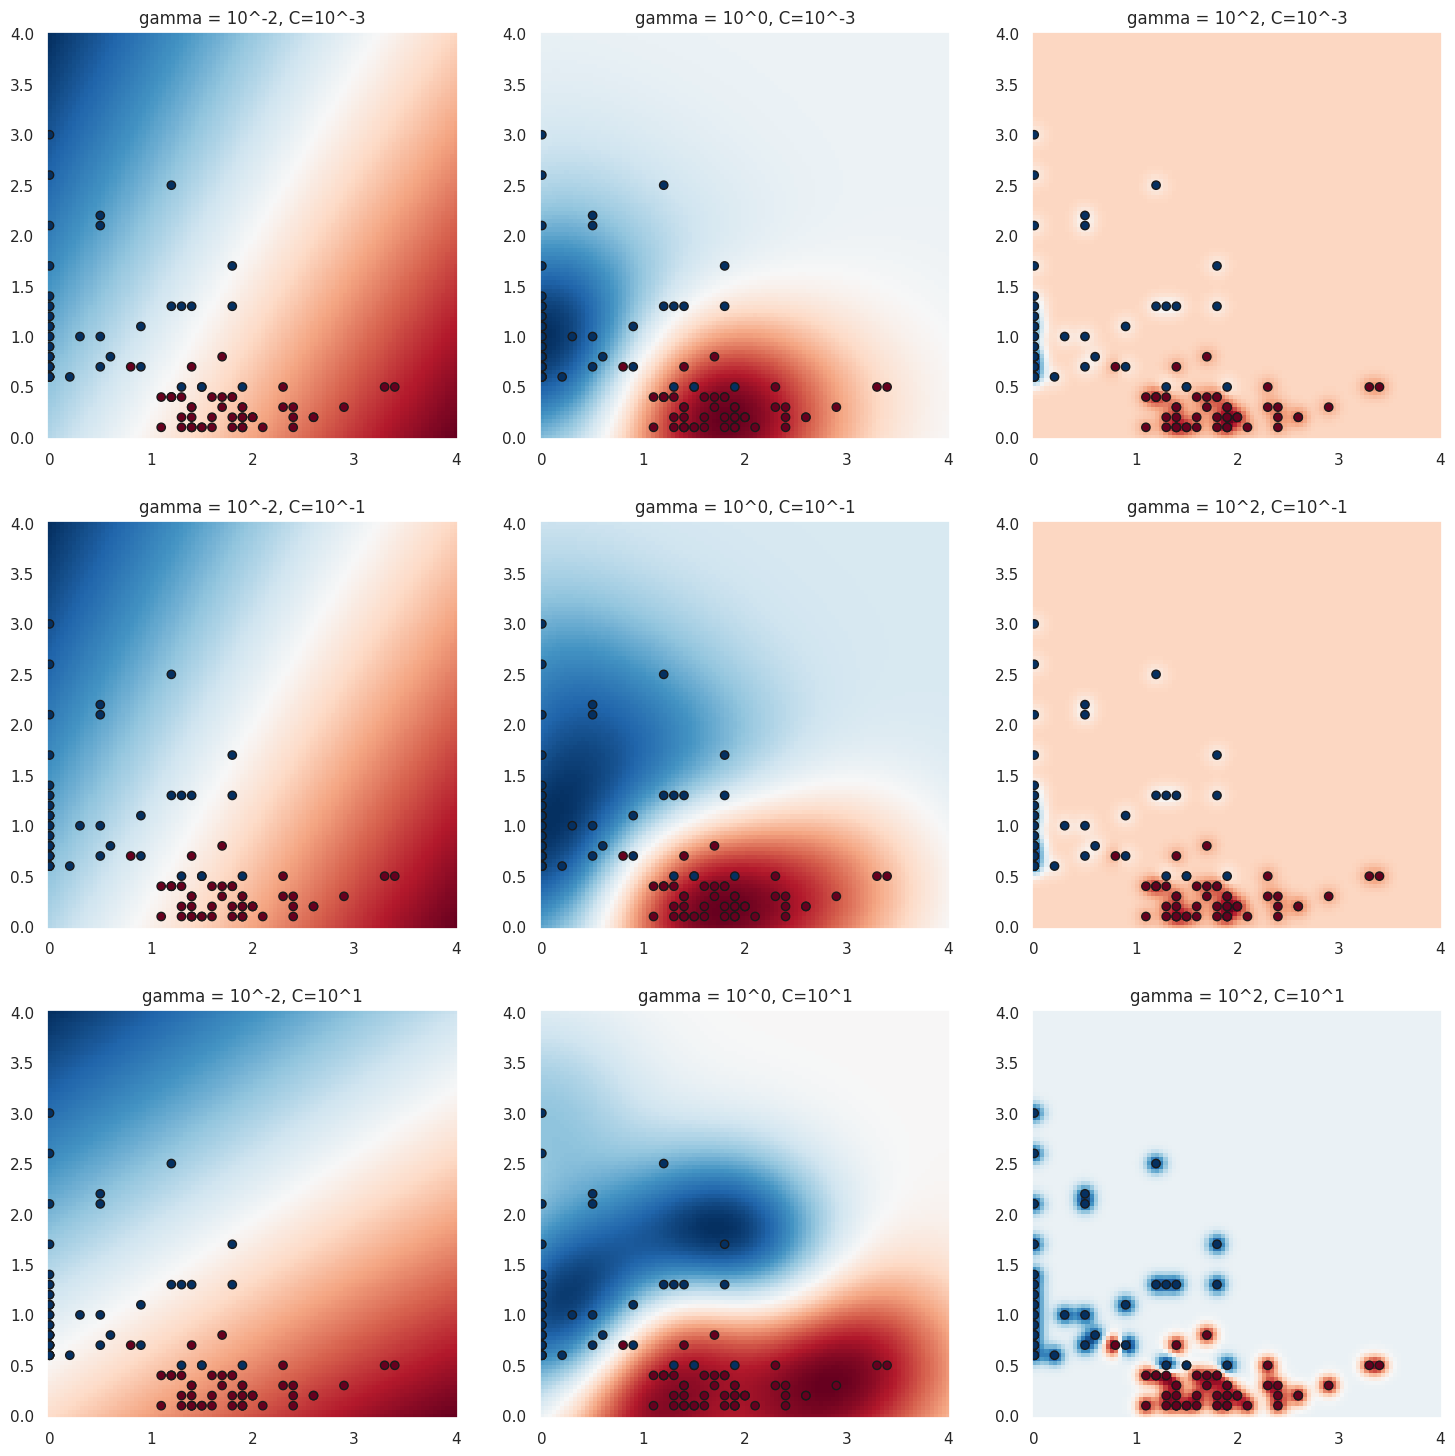

In [32]:
# 3 by 3 시각화
c_list = []
c_list.append(clf.best_params_['C'] * 0.01)
c_list.append(clf.best_params_['C'])
c_list.append(clf.best_params_['C'] * 100)

gamma_list = []
gamma_list.append(clf.best_params_['gamma'] * 0.01)
gamma_list.append(clf.best_params_['gamma'])
gamma_list.append(clf.best_params_['gamma'] * 100)

x = df[['3P', 'BLK']]
y = df['Pos'].tolist()

# 포지션에 해당하는 문자열(SG, C) 벡터화
position = []
for p in y:
  if p =='C':
    position.append(0)
  else:
    position.append(1)

# 각각의 파라미터에 해당하는 모델을 생성하여 저장하는 리스트
classifiers=[]
for c in c_list:
  for gamma in gamma_list:
    clf = SVC(C=c, gamma = gamma)
    clf.fit(x,y)
    classifiers.append((c, gamma, clf))

plt.figure(figsize=(18, 18))
# np.meshgrid: 1차원 좌표배열
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (c, gamma, clf)) in enumerate(classifiers):
   Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.subplot(3, 3, k + 1)
   plt.title('gamma = 10^%d, C=10^%d' % (np.log10(gamma), np.log10(c)), size='medium')

   plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
   plt.scatter(x['3P'], x['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')


- C가 클수록 마진이 작아진다.
- gamma가 클수록 결정 경계와 가깝다.

# 검증과 테스트

In [34]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))
print('Accuracy:', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Accuracy: 0.95


# 보고서

In [35]:
comparison = pd.DataFrame({'prediction': pred, 'Actual': y_test})
comparison

,prediction,Actual
26,SG,SG
86,SG,SG
2,C,C
55,SG,SG
75,C,C
93,C,C
16,C,C
73,SG,SG
54,SG,C
95,C,C


# 확인학습
- setosa와 versicolor만 선택하여 해당 데이터셋을 이용한 SVM 선형 분류

# Dataset Loading

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)  # == iris.keys()

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
x=iris['data']
y=iris['target']

x.shape, y.shape

((150, 4), (150,))

In [40]:
condition = (y==0)|(y==1)

x = x[condition]
y = y[condition]

x.shape, y.shape

((100, 4), (100,))

In [46]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df = df[df['target'] != 2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# 시각화를 통한 탐색

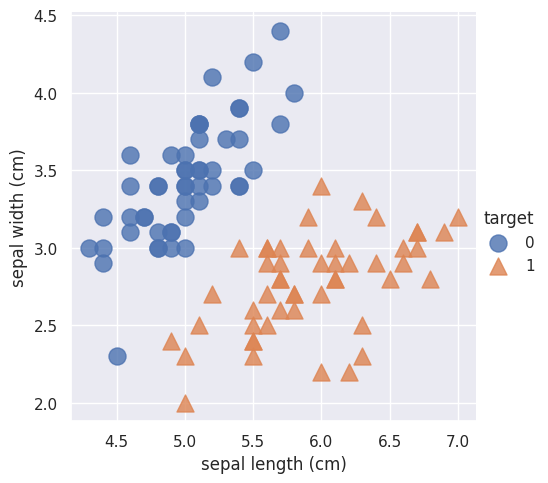

In [53]:
# sepal length와 sepal width 시각화
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df,
           hue='target', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)
# fit_reg=False: 그리드 선 없애기
# scatter_kws={'s':150}: 점 사이즈

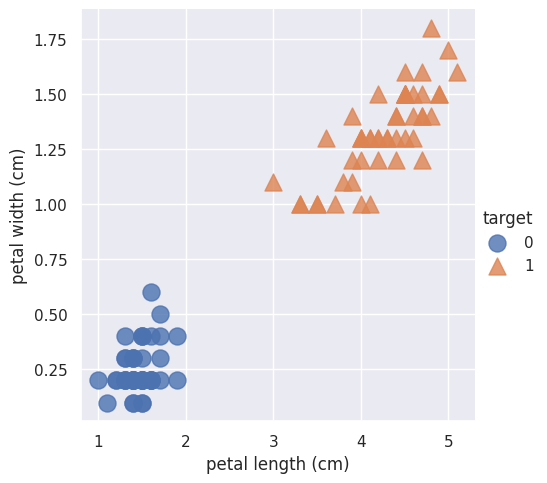

In [54]:
# petal length와 petal width 시각화
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=df,
           hue='target', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)

plt.show()

**Petal length와 Petal width 만으로도 구분이 확실해 보임**